In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline


In [450]:
dataset = pd.read_csv("heart.csv")
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [451]:
dataset.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [452]:
# pp.ProfileReport(dataset)


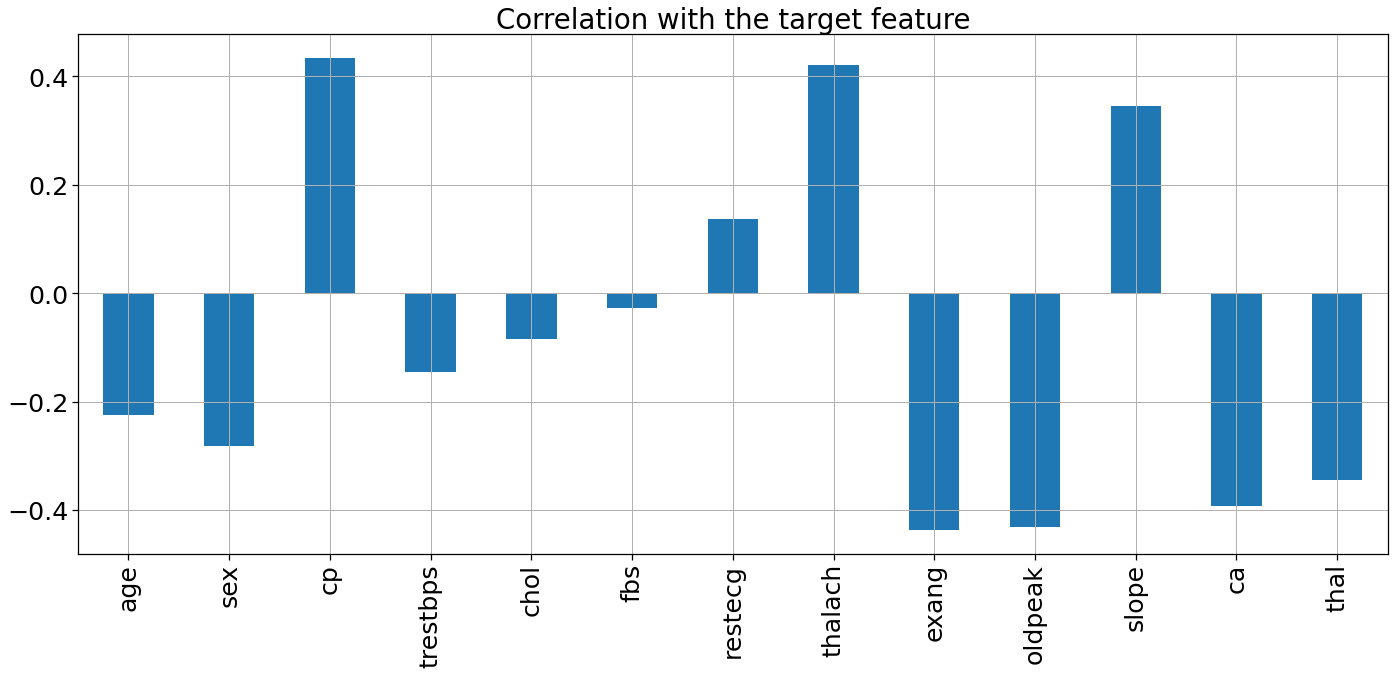

In [453]:
sns.set_context("notebook", font_scale=2.3)
dataset.drop("target", axis=1).corrwith(dataset.target).plot(
    kind="bar", grid=True, figsize=(20, 10), title="Correlation with the target feature"
)
plt.tight_layout()


In [454]:
X = dataset.iloc[:, :-1]
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [455]:
y = dataset.iloc[:, [-1]]
y.head()


,target
0,1
1,1
2,1
3,1
4,1


In [456]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [457]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [458]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# ensembling
from mlxtend.classifier import StackingCVClassifier

# DNN
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [459]:
dnn = Sequential()
dnn.add(keras.Input(shape=(13,)))
dnn.add(Dense(256, activation="relu"))
dnn.add(Dropout(0.1))
dnn.add(Dense(128, activation="relu"))
dnn.add(Dropout(0.2))
dnn.add(Dense(128, activation="relu"))
# dnn.add(Dropout(0.1))
dnn.add(Dense(1, activation="sigmoid"))
dnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

dnn.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=20,
    epochs=30,
)


Epoch 1/30
13/13 [==============================] - 1s 34ms/step - loss: 0.6124 - accuracy: 0.7025 - val_loss: 0.4508 - val_accuracy: 0.8197
Epoch 2/30
13/13 [==============================] - 0s 23ms/step - loss: 0.4152 - accuracy: 0.8347 - val_loss: 0.3364 - val_accuracy: 0.8689
Epoch 3/30
13/13 [==============================] - 0s 21ms/step - loss: 0.3423 - accuracy: 0.8388 - val_loss: 0.3411 - val_accuracy: 0.8852
Epoch 4/30
13/13 [==============================] - 0s 9ms/step - loss: 0.3297 - accuracy: 0.8471 - val_loss: 0.3545 - val_accuracy: 0.8689
Epoch 5/30
13/13 [==============================] - 0s 9ms/step - loss: 0.3077 - accuracy: 0.8719 - val_loss: 0.3580 - val_accuracy: 0.8689
Epoch 6/30
13/13 [==============================] - 0s 9ms/step - loss: 0.2849 - accuracy: 0.8678 - val_loss: 0.3341 - val_accuracy: 0.8689
Epoch 7/30
13/13 [==============================] - 0s 9ms/step - loss: 0.2862 - accuracy: 0.8802 - val_loss: 0.3573 - val_accuracy: 0.8689
Epoch 8/30
13/13 

In [460]:
y_pred = dnn.predict(X_test)
dnn_predicted = y_pred > 0.5
dnn_conf_matrix = confusion_matrix(y_test, dnn_predicted)
dnn_acc_score = accuracy_score(y_test, dnn_predicted)
print("confussion matrix")
print(dnn_conf_matrix)
print("\n")
print("Accuracy of DNN:", dnn_acc_score * 100, "\n")
print(classification_report(y_test, dnn_predicted))

confussion matrix
[[23  4]
 [ 3 31]]


Accuracy of DNN: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [461]:
shallow_tree = DecisionTreeClassifier(max_depth=1, random_state=100)
ab = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators=24)

ab.fit(X_train, y_train.values.ravel())
y_pred = ab.predict(X_test)

ab_predicted = ab.predict(X_test)
ab_conf_matrix = confusion_matrix(y_test, ab_predicted)
ab_acc_score = accuracy_score(y_test, ab_predicted)
print("confussion matrix")
print(ab_conf_matrix)
print("\n")
print("Accuracy of Ada Boost:", ab_acc_score * 100, "\n")
print(classification_report(y_test, ab_predicted))


confussion matrix
[[24  3]
 [ 4 30]]


Accuracy of Ada Boost: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [462]:
xgb = XGBClassifier(
    learning_rate=0.05,
    n_estimators=24,
    max_depth=10,
    gamma=0.2,
    subsample=0.52,
    colsample_bytree=0.54,
    seed=27,
    reg_lambda=2,
    colsample_bylevel=0.5,
    colsample_bynode=0.5,
)

xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:", xgb_acc_score * 100, "\n")
print(classification_report(y_test, xgb_predicted))


confussion matrix
[[22  5]
 [ 2 32]]


Accuracy of Extreme Gradient Boost: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [463]:
bc = BaggingClassifier(
    base_estimator=KNeighborsClassifier(),
    n_estimators=21,
    max_samples=0.5,
    max_features=0.6,
)

bc.fit(X_train, y_train.values.ravel())
bc_predicted = bc.predict(X_test)
bc_conf_matrix = confusion_matrix(y_test, bc_predicted)
bc_acc_score = accuracy_score(y_test, bc_predicted)
print("confussion matrix")
print(bc_conf_matrix)
print("\n")
print("Accuracy of Bagging Classifier:", bc_acc_score * 100, "\n")
print(classification_report(y_test, bc_predicted))


confussion matrix
[[19  8]
 [ 3 31]]


Accuracy of Bagging Classifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.79      0.91      0.85        34

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [464]:
rf = RandomForestClassifier(n_estimators=25, random_state=2, max_depth=5)
rf.fit(X_train, y_train.values.ravel())
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:", rf_acc_score * 100, "\n")
print(classification_report(y_test, rf_predicted))


confussion matrix
[[22  5]
 [ 4 30]]


Accuracy of Random Forest: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [465]:
svc = SVC(kernel="rbf", C=2, probability=True, gamma="auto")
svc.fit(X_train, y_train.values.ravel())
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:", svc_acc_score * 100, "\n")
print(classification_report(y_test, svc_predicted))


confussion matrix
[[23  4]
 [ 3 31]]


Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [476]:
scv = StackingCVClassifier(
    classifiers=[xgb, ab, svc], meta_classifier=rf, random_state=42
)
scv.fit(X_train, y_train.values.ravel())

scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:", scv_acc_score * 100, "\n")
print(classification_report(y_test, scv_predicted))


confussion matrix
[[22  5]
 [ 2 32]]


Accuracy of StackingCVClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

